In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
df=pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
7,3300,4,155.0
14,2250,3,101.0
3,1521,3,75.0
9,3700,5,167.0
6,2732,4,135.0


In [5]:
from sklearn.preprocessing import MinMaxScaler
sx=MinMaxScaler()
sy=MinMaxScaler()

scaled_x=sx.fit_transform(df.drop("price",axis=1))
scaled_y=sy.fit_transform(df[["price"]])

In [6]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

In [7]:
scaled_y.reshape(df['price'].shape[0],)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

# batch gradient descent

In [11]:
def batch_gradient_descent(X,y_true,epochs,learning_rate):
    number_of_features=X.shape[1] # two features are there bedrooms and area
    w=np.ones(shape=number_of_features) # w1 and w2
    b=0
    n=X.shape[0] # number of rows
    cost_list=[]
    epochs_list=[]
    for i in range(epochs):
        y_predicted=np.dot(X,w.T)+b
        w_grad=(-2/n)*np.dot(X.T,(y_true-y_predicted))
        b_grad=(-2/n)*np.sum(y_true-y_predicted)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        cost=np.mean(np.square(y_true-y_predicted)) # mse cost function

        if i%10==0:
            cost_list.append(cost)
            epochs_list.append(i)
    return w,b,cost,cost_list,epochs_list

In [13]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500,0.1)
w, b, cost, cost_list, epoch_list

(array([0.75550442, 0.41573953]),
 np.float64(-0.11682769564715854),
 np.float64(0.0034268126227234427),
 [np.float64(0.2768777174681),
  np.float64(0.015142621848227952),
  np.float64(0.011521234789028046),
  np.float64(0.009330879304359014),
  np.float64(0.007840283515760608),
  np.float64(0.006820371823619059),
  np.float64(0.006117481579662426),
  np.float64(0.00562826367938331),
  np.float64(0.005283203883426208),
  np.float64(0.005035541760450724),
  np.float64(0.004853818836824448),
  np.float64(0.004716867331443864),
  np.float64(0.004610440146799713),
  np.float64(0.004524944579903571),
  np.float64(0.004453918268119953),
  np.float64(0.004393004276824817),
  np.float64(0.004339261852527164),
  np.float64(0.004290702906107087),
  np.float64(0.004245980296333711),
  np.float64(0.004204178196978447),
  np.float64(0.0041646711138110986),
  np.float64(0.004127029067815048),
  np.float64(0.004090953824696992),
  np.float64(0.004056236002768403),
  np.float64(0.0040227262214208555),

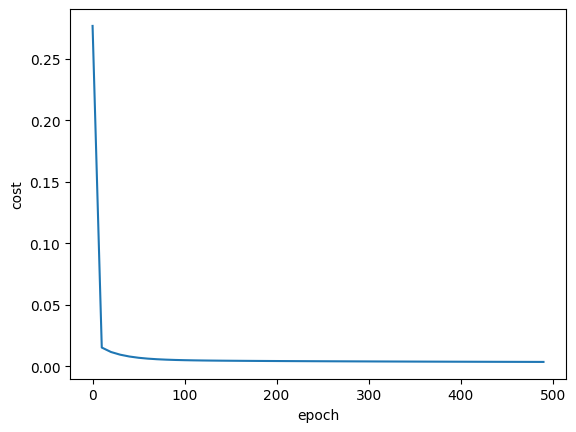

In [14]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

***lets do some predictions**

In [23]:
def predict(area,bedrooms,w,b):
    scaled_area=sx.transform([[area,bedrooms]])[0][0]
    scaled_bedrooms=sx.transform([[area,bedrooms]])[0][1]
    scaled_price=w[0]*scaled_area+w[1]*scaled_bedrooms+b
    original_price=sy.inverse_transform([[scaled_price]])[0][0]
    return original_price

In [24]:
predict(1000,2,w,b)

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(37.293476976103996)

# stochastic gd

In [25]:
import random
random.randint(0,100)

90

In [26]:
def stochastic_gd(X,y_true,epochs,learning_rate):
    number_of_features=X.shape[1] # two features are there bedrooms and area
    w=np.ones(shape=number_of_features) # w1 and w2
    b=0
    n=X.shape[0] # number of rows
    cost_list=[]
    epochs_list=[]
    for i in range(epochs):
        random_index=random.randint(0,n-1)
        X_i=X[random_index]
        y_true_i=y_true[random_index]

        y_predicted=np.dot(X_i,w.T)+b
        w_grad=(-2)*X_i*(y_true_i-y_predicted)
        b_grad=(-2)*(y_true_i-y_predicted)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        cost=np.mean(np.square(y_true-y_predicted)) # mse cost function

        if i%10==0:
            cost_list.append(cost)
            epochs_list.append(i)
    return w,b,cost,cost_list,epochs_list

In [27]:
stochastic_gd(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500,0.1)

(array([0.75848889, 0.41445182]),
 np.float64(-0.11654837814147816),
 np.float64(0.11089550780392463),
 [np.float64(0.10061656015978102),
  np.float64(0.35952180679313384),
  np.float64(0.3187463339387874),
  np.float64(0.3062093949966026),
  np.float64(0.1896500126645464),
  np.float64(0.2762230433525478),
  np.float64(0.12032158015614487),
  np.float64(0.7862432366248177),
  np.float64(0.16935459081246929),
  np.float64(0.1883241654908084),
  np.float64(0.1859171203374624),
  np.float64(0.3321939797623508),
  np.float64(0.10053604338419916),
  np.float64(0.10705492851329437),
  np.float64(0.2128386198817142),
  np.float64(0.11058336282484879),
  np.float64(0.09983381695092325),
  np.float64(0.2036749875916028),
  np.float64(0.23391272188375706),
  np.float64(0.10232108425142225),
  np.float64(0.33623670020477403),
  np.float64(0.5393366055980476),
  np.float64(0.16901092495482087),
  np.float64(0.1805008816941454),
  np.float64(0.1022516687674494),
  np.float64(0.10489703629851081),


# mini batch gd

In [34]:
def mini_batch_gd(X,y_batch,epochs,learning_rate,batch_size):
    number_of_features=X.shape[1] 
    w=np.ones(shape=number_of_features)
    b=0
    n=X.shape[0]
    cost_list=[]
    epochs_list=[]
    for i in range(epochs):
        random_indices=np.random.choice(n,size=batch_size,replace=True)
        X_i=X[random_indices]
        y_true_i=y_batch[random_indices]

        y_predicted=np.dot(X_i,w.T)+b
        w_grad=(-2/batch_size)*np.dot(X_i.T,(y_true_i-y_predicted))
        b_grad=(-2/batch_size)*np.sum(y_true_i-y_predicted)

        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        cost=np.mean(np.square(y_true_i-y_predicted)) # mse cost function

        if i%10==0:
            cost_list.append(cost)
            epochs_list.append(i)
    return w,b,cost,cost_list,epochs_list

In [32]:
mini_batch_gd(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500,0.1,2)

ValueError: operands could not be broadcast together with shapes (20,) (2,) 